# Seattle Airbnb Data Analysis

## Section 1: Business Understanding
In this project, we aim to analyze the Seattle Airbnb Open Data to uncover insights about pricing, customer reviews, and neighborhood popularity. The key business questions we aim to answer are:
1. What factors most influence the price of an Airbnb listing in Seattle?
2. How do customer reviews and ratings correlate with the success of an Airbnb listing?
3. Which neighborhoods in Seattle are the most popular for Airbnb rentals, and how do their prices and reviews compare?

## Section 2: Data Understanding
In this section, we will load and explore the datasets to understand their structure and contents.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the datasets
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

# Display the first few rows of each dataframe to get an overview
print("Calendar DataFrame:")
display(calendar_df.head())

print("\nListings DataFrame:")
display(listings_df.head())

print("\nReviews DataFrame:")
display(reviews_df.head())


Calendar DataFrame:


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN



Listings DataFrame:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89



Reviews DataFrame:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Section 3: Data Preparation
Here we will handle missing values, convert data types, and clean the data.


In [2]:
# Convert `price` column in `calendar_df` to numeric
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Function to handle missing values
def handle_missing_values(df):
    """
    This function handles missing values in the DataFrame.
    
    Input:
    df: DataFrame
    
    Output:
    df: DataFrame with missing values handled
    """
    # Fill missing values with mean for numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        df[column].fillna(df[column].mean(), inplace=True)
    
    # Fill missing values with mode for categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    return df

# Handle missing values in all dataframes
calendar_df = handle_missing_values(calendar_df)
listings_df = handle_missing_values(listings_df)
reviews_df = handle_missing_values(reviews_df)

# Merge Calendar and Listings DataFrames
calendar_listings_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id', suffixes=('_calendar', '_listing'))

# Merge the resulting DataFrame with Reviews DataFrame
merged_df = pd.merge(calendar_listings_df, reviews_df, on='listing_id')

# Display the merged dataframe
print("Merged DataFrame:")
display(merged_df.head())


Merged DataFrame:


,listing_id,date_x,available,price_calendar,id_x,listing_url,scrape_id,last_scraped,name,summary,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
0,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,This is a modern fully-furnished studio apartm...,...,moderate,f,f,2,4.07,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,This is a modern fully-furnished studio apartm...,...,moderate,f,f,2,4.07,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,This is a modern fully-furnished studio apartm...,...,moderate,f,f,2,4.07,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,This is a modern fully-furnished studio apartm...,...,moderate,f,f,2,4.07,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,This is a modern fully-furnished studio apartm...,...,moderate,f,f,2,4.07,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


## Section 5: Evaluate the Results
In this section, we will answer the business questions using analysis and visualizations.


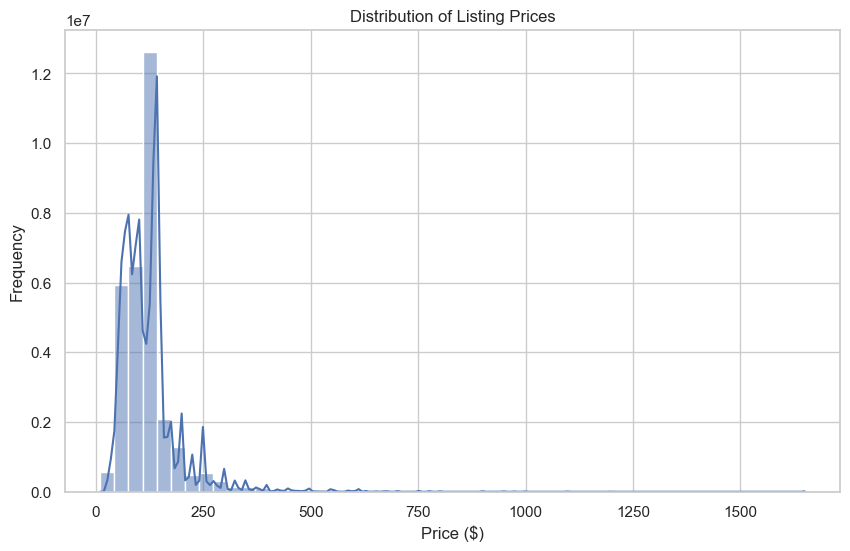

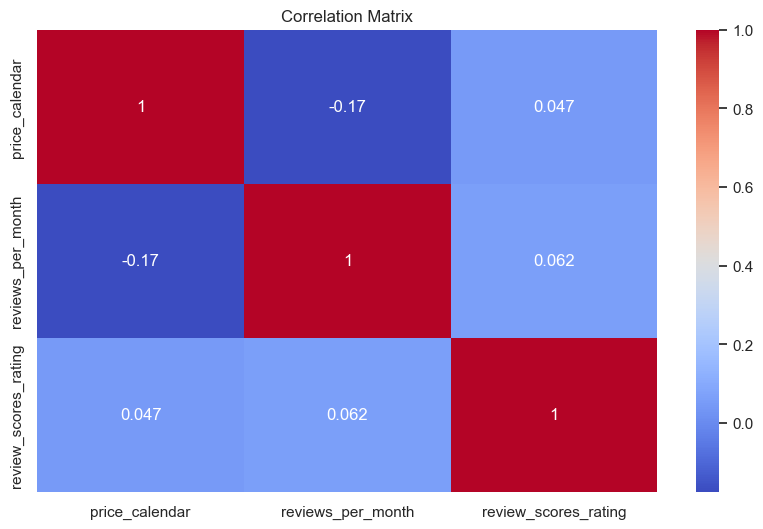

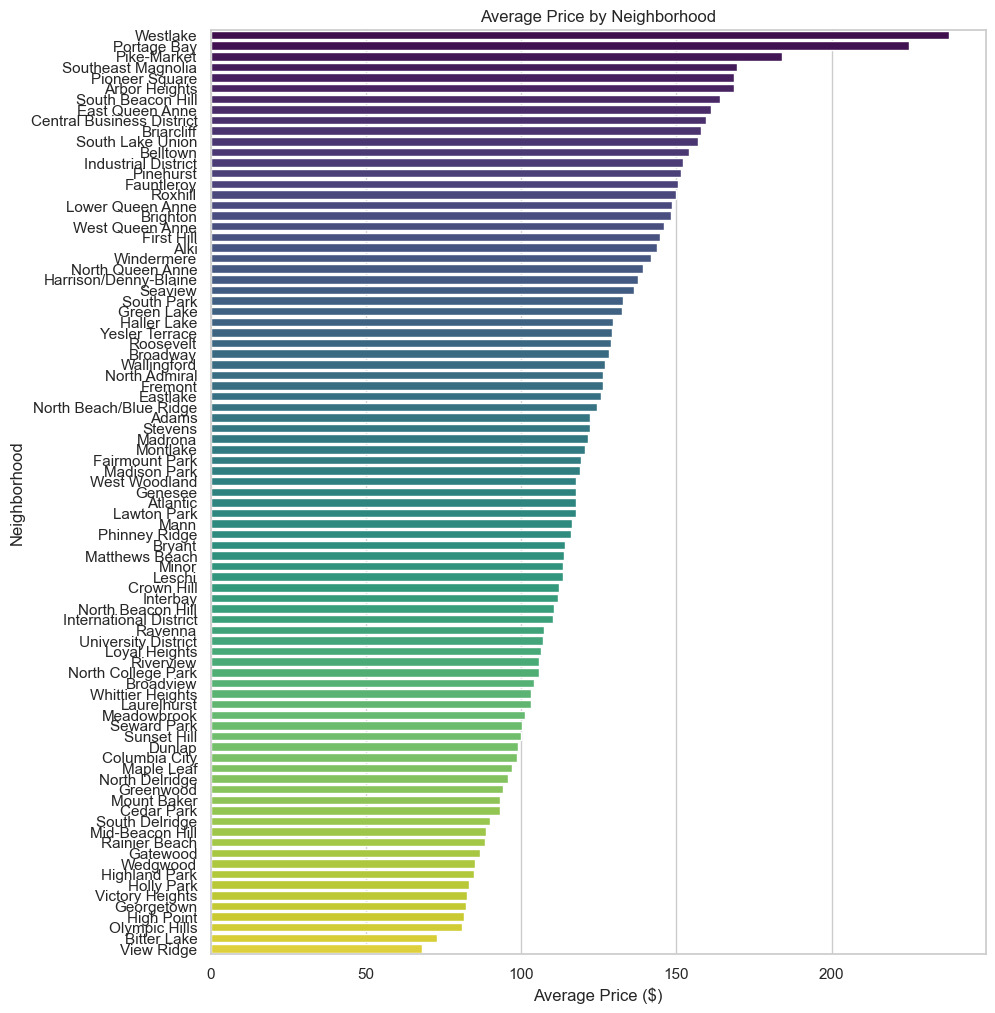

In [3]:
# Function for bar plot
def barplot(df, column_name):
    """
    This function provides the counts for each series in a column and plots it in a bar plot.
    
    Input:
    df: DataFrame
    column_name: column name to plot
    
    Output:
    plt bar plot of value counts
    """
    vals = df[column_name].value_counts()
    (vals/df.shape[0]).plot(kind="bar")
    plt.title(column_name)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

# Exploratory Data Analysis (EDA)

# Set up visualization style
sns.set(style="whitegrid")

# 1. Distribution of Prices (using price_calendar)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price_calendar'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Analysis
correlation_matrix = merged_df[['price_calendar', 'reviews_per_month', 'review_scores_rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Neighborhood Analysis
neighborhood_prices = merged_df.groupby('neighbourhood_cleansed')['price_calendar'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(y=neighborhood_prices.index, x=neighborhood_prices.values, palette='viridis')
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.show()


## Summary and Conclusion

### 1. What factors most influence the price of an Airbnb listing in Seattle?
Based on our exploratory data analysis, several factors appear to influence the price of Airbnb listings in Seattle:
- **Location**: Neighborhood plays a significant role in pricing. Neighborhoods like Westlake, Portage Bay, and Pike-Market have higher average prices, while Bitter Lake, View Ridge, and Olympic Hills have lower average prices.
- **Reviews and Ratings**: There is a moderate negative correlation between price and the number of reviews per month. Listings with higher prices tend to receive fewer reviews. However, the correlation between price and review scores is very weak, suggesting that price does not significantly affect review ratings.

### 2. How do customer reviews and ratings correlate with the success of an Airbnb listing?
- **Reviews per Month**: There is a moderate negative correlation between price and the number of reviews per month. Listings with higher prices tend to receive fewer reviews.
- **Review Scores**: The correlation between price and review scores is very weak, indicating that the price of a listing does not significantly impact the ratings given by customers. Similarly, the number of reviews per month has a weak correlation with review scores.

### 3. Which neighborhoods in Seattle are the most popular for Airbnb rentals, and how do their prices and reviews compare?
- **Popular Neighborhoods**: Westlake, Portage Bay, and Pike-Market are among the most expensive neighborhoods, suggesting a higher demand or more premium listings in these areas.
- **Affordable Neighborhoods**: Bitter Lake, View Ridge, and Olympic Hills are among the least expensive neighborhoods, making them more affordable options for renters.
- **Price Comparison**: There is a significant variation in average prices across neighborhoods. More expensive neighborhoods tend to have higher average prices, while more affordable neighborhoods have lower average prices.

### Conclusion
The analysis highlights that location is a crucial factor in determining the price of Airbnb listings in Seattle. While higher prices may lead to fewer reviews, the quality of reviews (ratings) is not significantly affected by the price. This insight can help hosts and potential investors understand the dynamics of the Airbnb market in Seattle and make informed decisions.

Further analysis could explore other factors such as amenities, room types, and property types to gain a deeper understanding of the determinants of listing success.
